In [1]:
# baalightcurve, but using jupyter to get more interactive with the data
#  New method: based on astropy Table (from AAVSO tutorial)
import matplotlib.pyplot as plt
import os
import datetime
from astropy.table import Table
from astropy.time import Time
import pandas as pd

In [2]:
# Functions for plotting.  
# take astropy Time objects as time axes to do JD -> UTC conversion
# define forward and reverse transforms for time conversion for second axis plotting
def forward(t_jd):
    ''' 
    t_jd is a numpy array of JD. Convert to Time object, then return decimal year equivalent
    '''
    t_decimalyr = Time(t_jd, format='jd').to_value(format='decimalyear')
    return t_decimalyr

def reverse(t_decimalyr):
    '''
    t_decimalyr is numpy array of astropy decimal year format values
    '''
    t_jd = Time(t_decimalyr, format='decimalyear').to_value(format='jd')
    return t_jd   

def plot_mylightcurve_twoaxis(alldata_time, alldata_mag, mydata_time, mydata_mag, chart_title, JDmin, JDmax):
    fig=plt.figure()
    ax1=fig.add_subplot(1,1,1)
    #  plot
    ax1.scatter(alldata_time.jd, alldata_mag, marker='.')
    ax1.scatter(mydata_time.jd, mydata_mag, marker='x')
    ax2 = ax1.secondary_xaxis('top', functions=(forward, reverse))
    plt.gca().invert_yaxis()
    plt.title(chart_title)
    plt.xlim([JDmin, JDmax])
    xvals = plt.gca().get_xticks()
    plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in xvals])

In [3]:
vssdir='/home/john/astro/variable_star_data/baa'

file_list = os.listdir(vssdir)

# housekeeping: remove spaces from downloaded baa file names
for var_file in file_list:
    if ' ' in var_file:
        var_file_new = var_file.replace(' ','_')
        print(var_file, '>>> ',var_file_new)
        #print(os.path.join(vssdir, var_file), '>>> ',os.path.join(vssdir, var_file_new))
        os.rename(os.path.join(vssdir, var_file), os.path.join(vssdir,var_file_new))
        
vss_file_list = os.listdir(vssdir)
print(vss_file_list)

['CH_CYG_20221127_085925.csv']


In [4]:
# define the variable star data file here
vssfile = vss_file_list[0]

In [5]:
# get baa data, load as astropy Table
star_name=vssfile.split('_2')[0]
vssfullpath = os.path.join(vssdir, vssfile)
baa_data = Table.read(vssfullpath, encoding='UTF-8')
baa_data.show_in_browser(jsviewer=True)

In [6]:
# What's the syntax for feinter than/brighter than?
# create a pandas data frame of the same data
# this is a rather ungainly way to do it, ideally work with one table/data frame
baa_data_pd = baa_data.to_pandas()

In [7]:
baa_data_pd.head()

,Object,Julian Date,UT,Magnitude Qualifier,Magnitude,Magnitude Error,Observer Name,Method,Equipment,Filter,Chart / Sequence,Visual Estimates,CCD Measurement Data: Measurement Type;Star Type;Star Id;Measured Mag;Measured Error;Reference Mag;Reference Error,Observation_Id
0,CH CYG,2459906.476,22 Nov 2022 23:25:00,Equal,7.1,NaN,R B I Fraser,Visual,B10 X50,No Filter,89.03,W+2,NaN,4635916
1,CH CYG,2459906.251,22 Nov 2022 18:01:00,Equal,6.6,NaN,G Poyner,Visual,10x50B,No Filter,89.04,A-1,NaN,4635589
2,CH CYG,2459904.267,20 Nov 2022 18:25:00,Equal,6.9,NaN,S W Albrighton,Visual,20x80B,No Filter,089.04,A(1)v(1)W,NaN,4635710
3,CH CYG,2459904.254,20 Nov 2022 18:06:00,Equal,6.7,NaN,G Poyner,Visual,10x50B,No Filter,89.04,A-2,NaN,4634777
4,CH CYG,2459902.389,18 Nov 2022 21:20:00,Equal,7.1,NaN,S W Albrighton,Visual,20x80B,No Filter,089.04,A(3)v(1)W,NaN,4635659


In [17]:
# use the pandas shortcut value.counts()
baa_data_pd['Magnitude Qualifier'].value_counts()

Equal       28180
Fainter       467
Brighter        4
Name: Magnitude Qualifier, dtype: int64

In [10]:
# an alternative way of doing the same is by using groupby
# this sorts by Magnitude Qualifier
baa_data_pd.groupby('Magnitude Qualifier').head()

,Object,Julian Date,UT,Magnitude Qualifier,Magnitude,Magnitude Error,Observer Name,Method,Equipment,Filter,Chart / Sequence,Visual Estimates,CCD Measurement Data: Measurement Type;Star Type;Star Id;Measured Mag;Measured Error;Reference Mag;Reference Error,Observation_Id
0,CH CYG,2.459906e+06,22 Nov 2022 23:25:00,Equal,7.1,NaN,R B I Fraser,Visual,B10 X50,No Filter,89.03,W+2,NaN,4635916
1,CH CYG,2.459906e+06,22 Nov 2022 18:01:00,Equal,6.6,NaN,G Poyner,Visual,10x50B,No Filter,89.04,A-1,NaN,4635589
2,CH CYG,2.459904e+06,20 Nov 2022 18:25:00,Equal,6.9,NaN,S W Albrighton,Visual,20x80B,No Filter,089.04,A(1)v(1)W,NaN,4635710
3,CH CYG,2.459904e+06,20 Nov 2022 18:06:00,Equal,6.7,NaN,G Poyner,Visual,10x50B,No Filter,89.04,A-2,NaN,4634777
4,CH CYG,2.459902e+06,18 Nov 2022 21:20:00,Equal,7.1,NaN,S W Albrighton,Visual,20x80B,No Filter,089.04,A(3)v(1)W,NaN,4635659
1459,CH CYG,2.458819e+06,1 Dec 2019 21:34:00,Fainter,10.5,NaN,M Radice,Visual,B28x100,No Filter,unknown,unknown,NaN,3645986
1792,CH CYG,2.458619e+06,15 May 2019 22:44:00,Fainter,8.5,NaN,M Barrett,Visual,B10x50,No Filter,89.03,[F,NaN,3498389
2042,CH CYG,2.458416e+06,24 Oct 2018 23:16:00,Fainter,7.3,NaN,T Vale,Visual,10x50B,No Filter,89.04,[W,NaN,3362498
2294,CH CYG,2.458308e+06,8 Jul 2018 22:19:00,Fainter,8.1,NaN,G M Hurst,Visual,15x80B,No Filter,89.02,[E,NaN,3304897
2869,CH CYG,2.457938e+06,3 Jul 2017 22:30:00,Fainter,8.1,NaN,G M Hurst,Visual,0.44-m refl.,No Filter,89.02,[E,NaN,3085244


In [12]:
# this sorts by Observer
baa_data_pd.groupby('Observer Name').head()

,Object,Julian Date,UT,Magnitude Qualifier,Magnitude,Magnitude Error,Observer Name,Method,Equipment,Filter,Chart / Sequence,Visual Estimates,CCD Measurement Data: Measurement Type;Star Type;Star Id;Measured Mag;Measured Error;Reference Mag;Reference Error,Observation_Id
0,CH CYG,2459906.476,22 Nov 2022 23:25:00,Equal,7.1,NaN,R B I Fraser,Visual,B10 X50,No Filter,89.03,W+2,NaN,4635916
1,CH CYG,2459906.251,22 Nov 2022 18:01:00,Equal,6.6,NaN,G Poyner,Visual,10x50B,No Filter,89.04,A-1,NaN,4635589
2,CH CYG,2459904.267,20 Nov 2022 18:25:00,Equal,6.9,NaN,S W Albrighton,Visual,20x80B,No Filter,089.04,A(1)v(1)W,NaN,4635710
3,CH CYG,2459904.254,20 Nov 2022 18:06:00,Equal,6.7,NaN,G Poyner,Visual,10x50B,No Filter,89.04,A-2,NaN,4634777
4,CH CYG,2459902.389,18 Nov 2022 21:20:00,Equal,7.1,NaN,S W Albrighton,Visual,20x80B,No Filter,089.04,A(3)v(1)W,NaN,4635659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28642,CH CYG,2439944.600,29 Mar 1968 02:24:00,Equal,7.5,NaN,J Muirden,Visual,NE,No Filter,unknown,not available,NaN,3211267
28644,CH CYG,2439943.600,28 Mar 1968 02:24:00.000000,Equal,7.5,NaN,J Muirden,Visual,NaN,No Filter,-,?,NaN,492658
28647,CH CYG,2439922.700,7 Mar 1968 04:48:00,Equal,8.0,NaN,J Muirden,Visual,NE,No Filter,unknown,not available,NaN,3211266
28648,CH CYG,2439912.700,26 Feb 1968 04:48:00.000000,Equal,7.5,NaN,J Muirden,Visual,NaN,No Filter,-,?,NaN,492655


In [13]:
# this version is comprehensive
baa_data_pd.groupby('Observer Name').count()

,Object,Julian Date,UT,Magnitude Qualifier,Magnitude,Magnitude Error,Method,Equipment,Filter,Chart / Sequence,Visual Estimates,CCD Measurement Data: Measurement Type;Star Type;Star Id;Measured Mag;Measured Error;Reference Mag;Reference Error,Observation_Id
Observer Name,,,,,,,,,,,,,
A Chapman,40,40,40,40,40,0,40,40,40,40,40,14,40
A Cook,2,2,2,2,2,0,2,2,2,2,2,0,2
A Good,7,7,7,7,7,0,7,7,7,7,7,2,7
A Hutchings,148,148,148,148,148,0,148,132,148,148,148,0,148
A J Hollis,7,7,7,7,7,0,7,7,7,7,7,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
V G Mormyl,10,10,10,10,10,0,10,0,10,10,10,0,10
V J Freeman,4,4,4,4,4,0,4,4,4,4,4,0,4
V Tuboly,61,61,61,61,61,0,61,0,61,61,61,0,61


In [15]:
# this version adda the ['Observer Name'] selection in [] brackets to report only the number of instances of
# this column (rather than the numbre of times the Observers enter notes, for example)
baa_data_pd.groupby('Observer Name')['Observer Name'].count()

Observer Name
A Chapman        40
A Cook            2
A Good            7
A Hutchings     148
A J Hollis        7
A J Johnston    122
A K Porter       89
A Kucinskas       1
A L Smith         3
A Mark            4
A R Baransky    402
A R Pratt         9
A Rodda          60
A Smeaton        39
B H Granslo     133
B J Beesley     229
B Jobson         46
B MacDonald      33
B O'Halloran     18
C D Beech        30
C E Aspling       4
C Henshaw       126
C J Evans        23
C J Fisher       18
C M Allen       100
C Mann           12
C Newman          8
C P Jones         7
C Pezzarossa     20
D A Pickup       19
Name: Observer Name, dtype: int64

In [16]:
baa_data_pd[baa_data_pd['Magnitude Qualifier']=='Brighter']

,Object,Julian Date,UT,Magnitude Qualifier,Magnitude,Magnitude Error,Observer Name,Method,Equipment,Filter,Chart / Sequence,Visual Estimates,CCD Measurement Data: Measurement Type;Star Type;Star Id;Measured Mag;Measured Error;Reference Mag;Reference Error,Observation_Id
11646,CH CYG,2.452275e+06,31 Dec 2001 17:34:56.640000,Brighter,8.0,NaN,D Gavine,Visual,"B11X80,",No Filter,89.02,>D,NaN,1668559
11971,CH CYG,2.452157e+06,4 Sep 2001 21:09:56.160000,Brighter,8.0,NaN,D Gavine,Visual,"B11X80,",No Filter,89.02,>D,NaN,1668541
11987,CH CYG,2.452148e+06,26 Aug 2001 22:20:03.840000,Brighter,8.0,NaN,D Gavine,Visual,"B11X80,",No Filter,89.02,>D,NaN,1668540
12292,CH CYG,2.452012e+06,12 Apr 2001 23:54:57.600000,Brighter,8.5,NaN,D Gavine,Visual,"B11X80,",No Filter,89.02,>F,NaN,1668529


In [17]:
baa_data_pd[baa_data_pd['Magnitude Qualifier']=='Fainter']

,Object,Julian Date,UT,Magnitude Qualifier,Magnitude,Magnitude Error,Observer Name,Method,Equipment,Filter,Chart / Sequence,Visual Estimates,CCD Measurement Data: Measurement Type;Star Type;Star Id;Measured Mag;Measured Error;Reference Mag;Reference Error,Observation_Id
1459,CH CYG,2458819.399,1 Dec 2019 21:34:00,Fainter,10.50,NaN,M Radice,Visual,B28x100,No Filter,unknown,unknown,NaN,3645986
1792,CH CYG,2458619.447,15 May 2019 22:44:00,Fainter,8.50,NaN,M Barrett,Visual,B10x50,No Filter,89.03,[F,NaN,3498389
2042,CH CYG,2458416.469,24 Oct 2018 23:16:00,Fainter,7.30,NaN,T Vale,Visual,10x50B,No Filter,89.04,[W,NaN,3362498
2294,CH CYG,2458308.430,8 Jul 2018 22:19:00,Fainter,8.10,NaN,G M Hurst,Visual,15x80B,No Filter,89.02,[E,NaN,3304897
2869,CH CYG,2457938.438,3 Jul 2017 22:30:00,Fainter,8.10,NaN,G M Hurst,Visual,0.44-m refl.,No Filter,89.02,[E,NaN,3085244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28481,CH CYG,2441070.400,28 Apr 1971 21:36:00.000000,Fainter,8.27,NaN,P W Hornby,Visual,B10X50,No Filter,3,<19,NaN,492808
28489,CH CYG,2441060.400,18 Apr 1971 21:36:00.000000,Fainter,7.83,NaN,P W Hornby,Visual,B10X50,No Filter,3,<17,NaN,492801
28501,CH CYG,2441053.400,11 Apr 1971 21:36:00.000000,Fainter,7.83,NaN,I D Howarth,Visual,B7X50,No Filter,3,<17,NaN,492789
28502,CH CYG,2441051.600,10 Apr 1971 02:24:00.000000,Fainter,8.40,NaN,C Henshaw,Visual,B10X50,No Filter,3,<84,NaN,492788


In [11]:
# find my observations
my_baa_data = Table(dtype=baa_data.dtype)
for observation in baa_data:
    if 'C J Evans' in observation['Observer Name']:
        my_baa_data.add_row(observation)
        
# convert time axis to astropy Time for jd<->decimalyear calcs

baa_time = Time(baa_data['Julian Date'], format='jd')
my_baa_time = Time(my_baa_data['Julian Date'], format='jd')

/tmp/ipykernel_56746/960313849.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in xvals])
/home/john/miniconda3/envs/astro/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 2 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/john/miniconda3/envs/astro/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 2 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/john/miniconda3/envs/astro/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 2 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


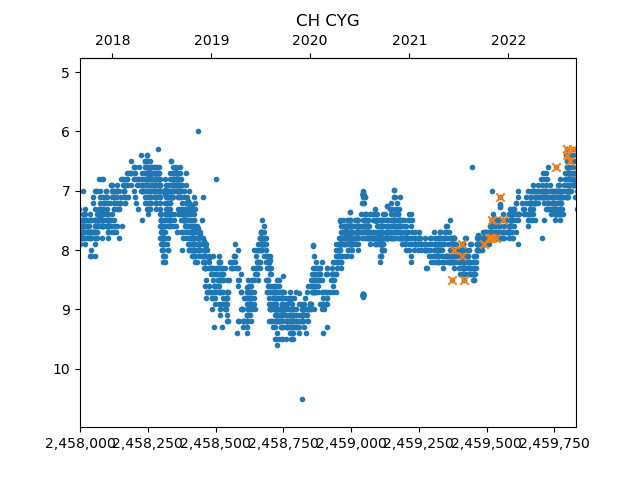

In [7]:
# plot all data, overlaying my observations
%matplotlib widget
plot_mylightcurve_twoaxis(baa_time, baa_data['Magnitude'], my_baa_time, my_baa_data['Magnitude'], my_baa_data['Object'][0], 2458000, 2459830)

In [ ]:
# >>>>>>>>>>>>>>  OLD CODE  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [ ]:
# overlay my measurements with all measurements from BAA database
#  using modified version of function from aavso
# use the matplotlib interactive widget (ipympl)
def plot_mylightcurve(alldata_JD, alldata_mag, mydata_JD, mydata_mag, chart_title, JDmin, JDmax):
    fig=plt.figure()
    ax1=fig.add_subplot(1,1,1)
    ax1.scatter(alldata_JD, alldata_mag, marker='.')
    ax1.scatter(mydata_JD, mydata_mag, marker='x')
    plt.gca().invert_yaxis()
    plt.title(chart_title)
    plt.xlim([JDmin, JDmax])
    xvals = plt.gca().get_xticks()
    plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in xvals])

In [ ]:
%matplotlib widget
plot_mylightcurve(baa_data['Julian Date'], baa_data['Magnitude'], my_baa_data['Julian Date'], my_baa_data['Magnitude'], my_baa_data['Object'][0], 2458000, 2459830)